In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

import warnings

In [11]:
df = pd.read_csv("Darknet.csv", delimiter=',', on_bad_lines='skip')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
df['Date'] = df['Timestamp'].dt.date

In [40]:
## ----------- Load Darknet Dataset -----------
df = pd.read_csv("Darknet.csv", delimiter=',', on_bad_lines='skip')

# Convert timestamp to date
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')
df['Date'] = df['Timestamp'].dt.date

# Define main hubs
main_hubs = ["Non-Tor", "NonVPN", "VPN", "Tor"]

# Filter dataset for relevant edges
df_filtered = df[df["Label"].isin(main_hubs)]
filtered_df_2 = df_filtered[["Label", "Label.1"]]

filtered_df_2

,Label,Label.1
0,Non-Tor,AUDIO-STREAMING
1,Non-Tor,AUDIO-STREAMING
2,Non-Tor,AUDIO-STREAMING
3,Non-Tor,AUDIO-STREAMING
4,Non-Tor,AUDIO-STREAMING
...,...,...
141525,VPN,VOIP
141526,VPN,VOIP
141527,VPN,VOIP
141528,VPN,VOIP


In [ ]:
main_hubs = ["Non-Tor", "NonVPN", "VPN", "Tor"]  
filtered_df = df[df["Label"].isin(main_hubs)]  
filtered_df_2 = filtered_df[["Date", "Label", "Label.1"]]  

airline_graph = nx.from_pandas_edgelist(filtered_df_2, source="Label", target="Label.1")

In [14]:
print(airline_graph)

Graph with 15 nodes and 30 edges


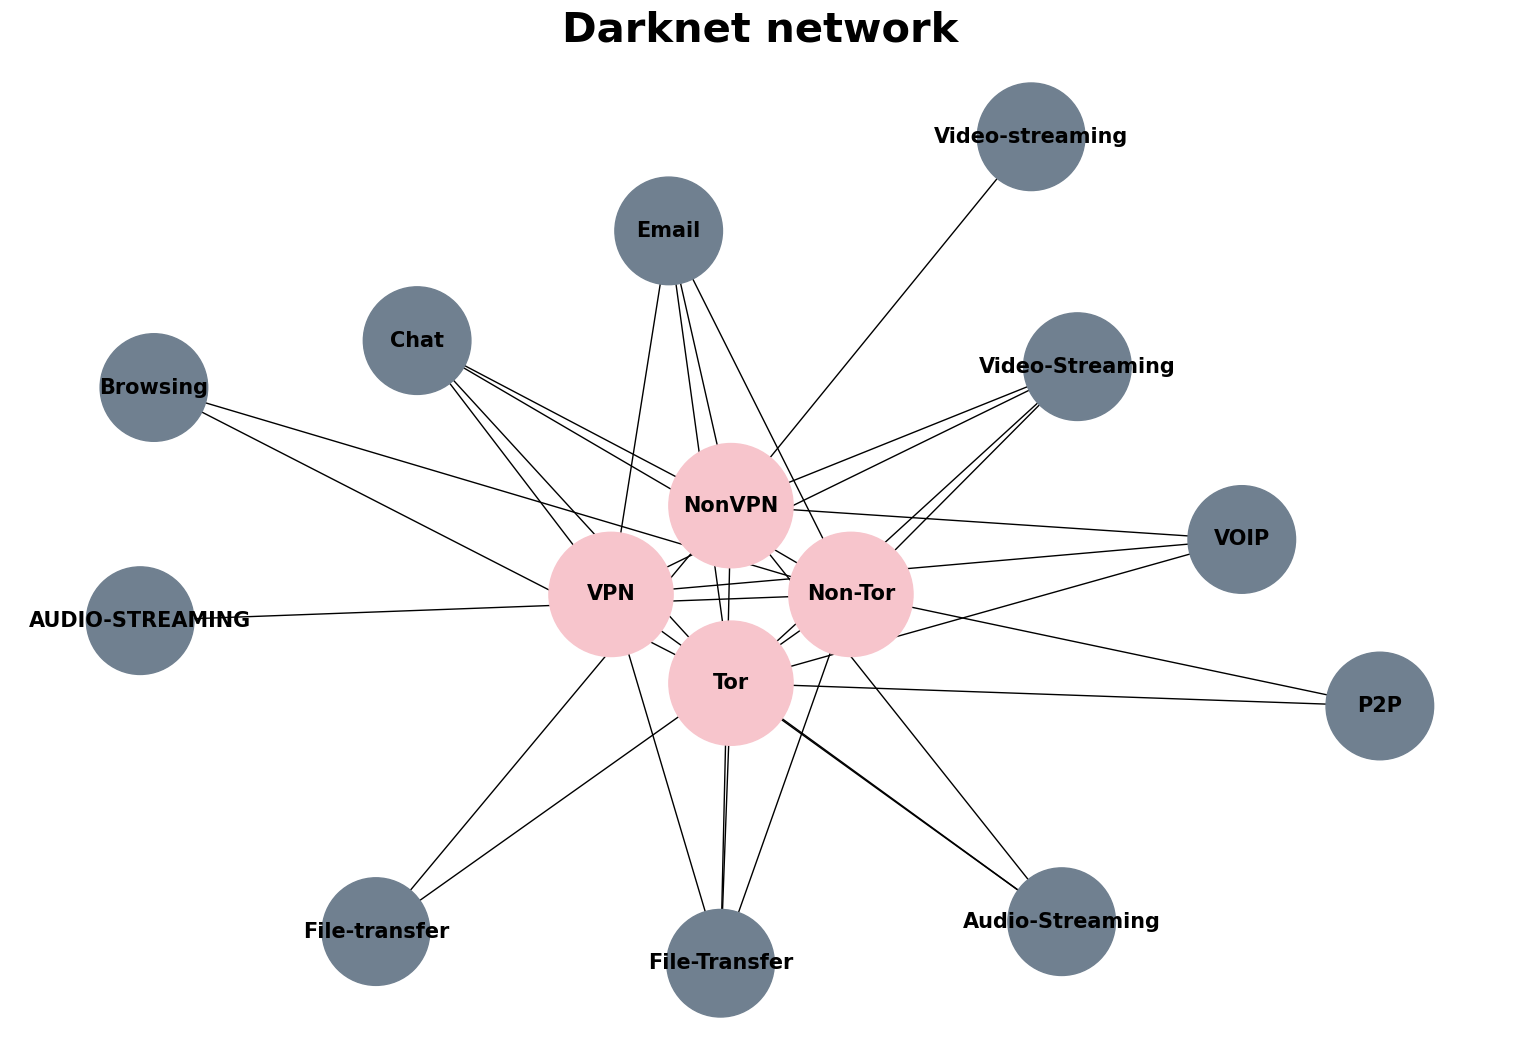

In [39]:
import networkx as nx
import numpy as np

# Define node attributes
node_attributes = {}
for node in airline_graph.nodes():
    if node in main_hubs:
        node_attributes[node] = {'color': '#F7C5CC', 'size': 8000} 
    else:
        node_attributes[node] = {'color': '#708090', 'size': 6000}  

nx.set_node_attributes(airline_graph, node_attributes)

num_hubs = len(main_hubs)
radius = 0.9  
angles = np.linspace(0, 10 * np.pi, num_hubs, endpoint=False)
fixed_positions = {hub: (radius * np.cos(angle), radius * np.sin(angle)) for hub, angle in zip(main_hubs, angles)}
pos = nx.spring_layout(airline_graph, scale=1, pos=fixed_positions, fixed=main_hubs,k=3)

plt.figure(figsize=(15, 10)) 
nx.draw(airline_graph, pos, 
        node_color=[node_attributes[node]['color'] for node in airline_graph.nodes()],
        node_size=[node_attributes[node]['size'] for node in airline_graph.nodes()],
        with_labels=True,font_size=15,font_weight="bold")

plt.title("Darknet network", fontsize=30, fontweight='bold')
plt.show()